# Simulating AMICI models using JAX

## Overview

This guide demonstrates how to use AMICI to export models in a format compatible with the [JAX](https://jax.readthedocs.io/en/latest/) ecosystem, enabling simulations with the [diffrax](https://docs.kidger.site/diffrax/) library.

## Preparation

To begin, we will import a model using [PEtab](https://petab.readthedocs.io). For this demonstration, we will utilize the [Benchmark Collection](https://github.com/Benchmarking-Initiative/Benchmark-Models-PEtab), which provides a diverse set of models. For more information on importing PEtab models, refer to the corresponding [PEtab notebook](https://amici.readthedocs.io/en/latest/petab.html).

In this tutorial, we will import the Böhm model from the Benchmark Collection. Using [amici.petab_import](https://amici.readthedocs.io/en/latest/generated/amici.petab_import.html#amici.petab_import.import_petab_problem), we will load the PEtab problem. To create a  [JAXProblem](https://amici.readthedocs.io/en/latest/generated/amici.jax.html#amici.jax.JAXProblem) instead of a standard AMICI model, we set the `jax` parameter to `True`.


In [1]:
import petab.v1 as petab
from amici.importers.petab import *
from petab.v2 import petab1to2

# Define the model name and YAML file location
model_name = "Boehm_JProteomeRes2014"
yaml_url = (
    f"https://raw.githubusercontent.com/Benchmarking-Initiative/Benchmark-Models-PEtab/"
    f"master/Benchmark-Models/{model_name}/{model_name}.yaml"
)

# Load the PEtab problem from the YAML file
# petab_problem = petab.Problem.from_yaml(yaml_url)

# Load the PEtab problem from the YAML file as a PEtab v2 problem
# (the JAX backend only supports PEtab v2)
petab_problem = petab1to2.petab1to2(yaml_url)

# Import the PEtab problem as a JAX-compatible AMICI problem
pi = PetabImporter(
    petab_problem=petab_problem,
    module_name=model_name,
    compile_=True,
    jax=True,
)

jax_problem = pi.create_simulator(
    force_import=True,
)

2026-01-22 09:19:49.553 - amici.importers.petab._petab_importer - INFO - Validating PEtab problem ...
2026-01-22 09:19:49.599 - amici.importers.petab._petab_importer - INFO - Importing model 'model_Boehm_JProteomeRes2014'...
2026-01-22 09:19:49.599 - amici.importers.petab._petab_importer - INFO - Module name is 'Boehm_JProteomeRes2014'.
Writing model code to 'amici_models/1.0.0.dev/Boehm_JProteomeRes2014_jax'.
2026-01-22 09:19:49.599 - amici.importers.petab._petab_importer - INFO - #Observables: 3
2026-01-22 09:19:49.610 - amici.importers.petab._petab_importer - INFO - Number of fixed parameters: 2
2026-01-22 09:19:49.643 - amici.importers.sbml - INFO - Finished importing SBML                      (2.99E-02s)
2026-01-22 09:19:49.649 - amici.importers.sbml - INFO - Finished processing observation model        (3.25E-03s)
2026-01-22 09:19:49.749 - amici.jax.ode_export - INFO - Finished generating jax code                 (8.18E-02s)


## Simulation

We can now run efficient simulation using [amici.jax.run_simulations]((https://amici.readthedocs.io/en/latest/generated/amici.jax.html#amici.jax.run_simulations).

In [2]:
from amici.jax import run_simulations

# Run simulations and compute the log-likelihood
llh, results = run_simulations(jax_problem)

x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.6982514e-02 1.0006797e-05 6.1702281e-03 1.6367918e-02 9.7749383e+04
 1.5766507e+04 6.9300002e-01 1.0700000e-01 0.0000000e+00 1.0000000e+00
 3.8526120e+00 3.8526120e+00 3.8526120e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [inf inf inf inf inf inf inf inf], numsteps = 1024, numrejected = 247, result = diffrax._solution.RESULTS<The maximum number of solver steps was reached. Try increasing `max_steps`.>
ret: ReturnValue.llh


In [3]:
results

{'hs': Array([], shape=(1, 48, 0), dtype=float32),
 'llh': Array([nan], dtype=float32),
 'stats_dyn': {'max_steps': 1024,
  'num_accepted_steps': Array([777], dtype=int32, weak_type=True),
  'num_rejected_steps': Array([247], dtype=int32, weak_type=True),
  'num_steps': Array([1024], dtype=int32, weak_type=True)},
 'stats_posteq': None,
 'ts': Array([[  0. ,   0. ,   0. ,   2.5,   2.5,   2.5,   5. ,   5. ,   5. ,
          10. ,  10. ,  10. ,  15. ,  15. ,  15. ,  20. ,  20. ,  20. ,
          30. ,  30. ,  30. ,  40. ,  40. ,  40. ,  50. ,  50. ,  50. ,
          60. ,  60. ,  60. ,  80. ,  80. ,  80. , 100. , 100. , 100. ,
         120. , 120. , 120. , 160. , 160. , 160. , 200. , 200. , 200. ,
         240. , 240. , 240. ]], dtype=float32),
 'x': Array([[[143.8668,  63.7332,   0.    ,   0.    ,   0.    ,   0.    ,
            0.    ,   0.    ],
         [143.8668,  63.7332,   0.    ,   0.    ,   0.    ,   0.    ,
            0.    ,   0.    ],
         [143.8668,  63.7332,   0.    , 

This simulates the model for all conditions using the nominal parameter values. Simple, right? Now, let’s take a look at the simulation results.

In [4]:
# # Define the simulation condition
experiment_condition = "_petab_experiment_condition___default__"

# # Access the results for the specified condition
ic = results["dynamic_conditions"].index(experiment_condition)
print("llh: ", results["llh"][ic])
print("state variables: ", results["x"][ic, :])

llh:  nan
state variables:  [[143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
 [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
 [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      inf]
 [     inf      inf      inf      inf      inf      inf      inf      in

Unfortunately, the simulation failed! As seen in the output, the simulation broke down after the initial timepoint, indicated by the `inf` values in the state variables `results['x']` and the `nan` likelihood value. A closer inspection of this variable provides additional clues about what might have gone wrong.

The issue stems from using single precision, as indicated by the `float32` dtype of state variables. Single precision is generally a [bad idea](https://docs.kidger.site/diffrax/examples/stiff_ode/) for stiff systems like the Böhm model. Let’s retry the simulation with double precision.

In [5]:
import jax

# Enable double precision in JAX
jax.config.update("jax_enable_x64", True)

# Re-run simulations with double precision
llh, results = run_simulations(jax_problem)

results

x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 132, numrejected = 7, result = diffrax._solution.RESULTS<>
ret: ReturnValue.llh


{'hs': Array([], shape=(1, 48, 0), dtype=float64),
 'llh': Array([-145.60377959], dtype=float64),
 'stats_dyn': {'max_steps': 1024,
  'num_accepted_steps': Array([125], dtype=int64, weak_type=True),
  'num_rejected_steps': Array([7], dtype=int64, weak_type=True),
  'num_steps': Array([132], dtype=int64, weak_type=True)},
 'stats_posteq': None,
 'ts': Array([[  0. ,   0. ,   0. ,   2.5,   2.5,   2.5,   5. ,   5. ,   5. ,
          10. ,  10. ,  10. ,  15. ,  15. ,  15. ,  20. ,  20. ,  20. ,
          30. ,  30. ,  30. ,  40. ,  40. ,  40. ,  50. ,  50. ,  50. ,
          60. ,  60. ,  60. ,  80. ,  80. ,  80. , 100. , 100. , 100. ,
         120. , 120. , 120. , 160. , 160. , 160. , 200. , 200. , 200. ,
         240. , 240. , 240. ]], dtype=float64),
 'x': Array([[[1.43866800e+02, 6.37332000e+01, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.43866800e+02, 6.37332000e+01, 0.00000000e+00, 0.00000000e+00,
          0.

Success! The simulation completed successfully, and we can now plot the resulting state trajectories.

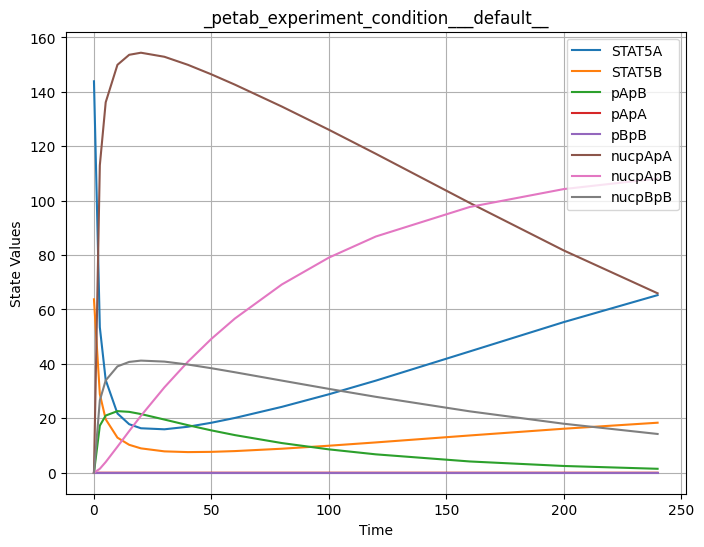

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Define the experiment condition
experiment_condition = "_petab_experiment_condition___default__"


def plot_simulation(results):
    """
    Plot the state trajectories from the simulation results.

    Parameters:
        results (dict): Simulation results from run_simulations.
    """
    # Extract the simulation results for the specific condition
    ic = results["dynamic_conditions"].index(experiment_condition)

    # Create a new figure for the state trajectories
    plt.figure(figsize=(8, 6))
    for ix in range(results["x"].shape[2]):
        time_points = np.array(results["ts"][ic, :])
        state_values = np.array(results["x"][ic, :, ix])
        plt.plot(
            time_points, state_values, label=jax_problem.model.state_ids[ix]
        )

    # Add labels, legend, and grid
    plt.xlabel("Time")
    plt.ylabel("State Values")
    plt.title(experiment_condition)
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot the simulation results
plot_simulation(results)

`run_simulations` enables users to specify the simulation conditions to be executed. For more complex models, this allows for restricting simulations to a subset of conditions. The Böhm model includes only a single experimental condition, so we have to simulate that one.

In [24]:
# llh, results = run_simulations(jax_problem, simulation_experiments=tuple()
# results

## Updating Parameters

As next step, we will update the parameter values used for simulation. However, if we attempt to directly modify the values in `JAXModel.parameters`, we encounter a `FrozenInstanceError`.

In [7]:
from dataclasses import FrozenInstanceError

import jax

# Generate random noise to update the parameters
noise = (
    jax.random.normal(
        key=jax.random.PRNGKey(0), shape=jax_problem.parameters.shape
    )
    / 10
)

# Attempt to update the parameters
try:
    jax_problem.parameters += noise
except FrozenInstanceError as e:
    print("Error:", e)

Error: cannot assign to field 'parameters'


The root cause of this error lies in the fact that, to enable autodiff, direct modifications of attributes are not allowed in [equinox](https://docs.kidger.site/equinox/), which AMICI utilizes under the hood. Consequently, attributes of instances like `JAXModel` or `JAXProblem` cannot be updated directly — this is the price we have to pay for autodiff.

However, `JAXProblem` provides a convenient method called [update_parameters](https://amici.readthedocs.io/en/latest/generated/amici.jax.html#amici.jax.JAXProblem.update_parameters). The caveat is that this method creates a new JAXProblem instance instead of modifying the existing one.

x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 132, numrejected = 7, result = diffrax._solution.RESULTS<>
ret: ReturnValue.llh


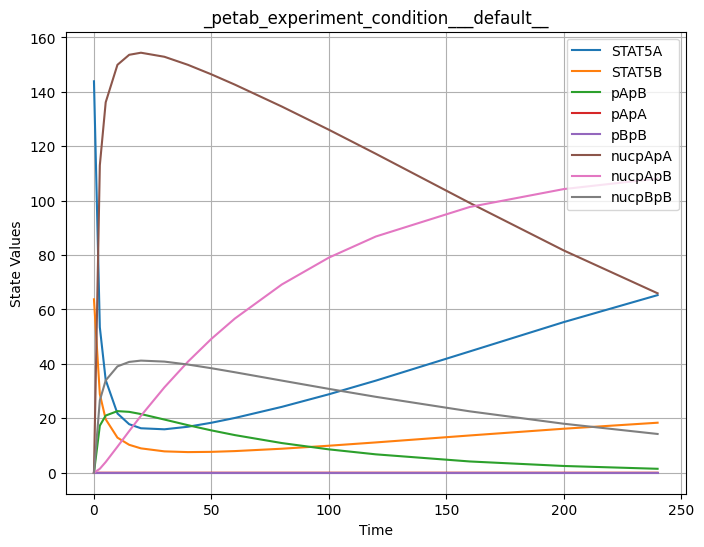

In [8]:
# Update the parameters and create a new JAXProblem instance
jax_problem = jax_problem.update_parameters(jax_problem.parameters + noise)

# Run simulations with the updated parameters
llh, results = run_simulations(jax_problem)

# Plot the simulation results
plot_simulation(results)

## Computing Gradients

Similar to updating attributes, computing gradients in the JAX ecosystem can feel a bit unconventional if you’re not familiar with the JAX ecosystem. JAX offers [automatic differentiation](https://jax.readthedocs.io/en/latest/automatic-differentiation.html) through the `jax.grad` function. However, to use `jax.grad` with `JAXProblem`, we need to specify which parts of the `JAXProblem` should be treated as static.

In [9]:
try:
    # Attempt to compute the gradient of the run_simulations function
    jax.grad(run_simulations, has_aux=True)(jax_problem)
except TypeError as e:
    print("Error:", e)

Error: Argument '/workspace/AMICI/doc/examples/example_jax_petab/amici_models/1.0.0.dev/Boehm_JProteomeRes2014_jax/__init__.py' of type <class 'pathlib.PosixPath'> is not a valid JAX type.


Fortunately, `equinox` simplifies this process by offering [filter_grad](https://docs.kidger.site/equinox/api/transformations/#equinox.filter_grad), which enables autodiff functionality that is compatible with `JAXProblem` and, in theory, also with `JAXModel`.

In [10]:
import equinox as eqx

# Compute the gradient using equinox's filter_grad, preserving auxiliary outputs
grad, _ = eqx.filter_grad(run_simulations, has_aux=True)(jax_problem)

handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 132, numrejected = 7, result = diffrax._solution.RESULTS<>
ret: ReturnValue.llh


Functions transformed by `filter_grad` return gradients that share the same structure as the first argument (unless specified otherwise). This allows us to access the gradient with respect to the parameters attribute directly `via grad.parameters`.

In [11]:
grad.parameters

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float64)

Attributes for which derivatives cannot be computed (typically anything that is not a [jax.numpy.array](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.array.html)) are automatically set to `None`.

In [12]:
grad

JAXProblem(
  parameters=f64[11],
  model=JAXModel_Boehm_JProteomeRes2014(
    api_version='0.0.4', jax_py_file=None, nns={}, parameters=f32[13]
  ),
  simulation_conditions=[None],
  _parameter_mappings=None,
  _ts_dyn=f64[1,48],
  _ts_posteq=f64[1,0],
  _my=f64[1,48],
  _iys=None,
  _iy_trafos=None,
  _ts_masks=None,
  _op_numeric=f32[1,48,1],
  _op_mask=None,
  _op_indices=None,
  _np_numeric=f64[1,48,1],
  _np_mask=None,
  _np_indices=None,
  _petab_measurement_indices=f64[1,48],
  _petab_problem=None
)

Observant readers may notice that the gradient above appears to include numeric values for derivatives with respect to some measurements. However, `simulation_conditions` internally disables gradient computations using `jax.lax.stop_gradient`, resulting in these values being zeroed out.

In [13]:
grad._my[ic, :]

Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],      dtype=float64)

However, we can compute derivatives with respect to data elements using `JAXModel.simulate_condition`. In the example below, we differentiate the observables `y` (specified by passing `y` to the `ret` argument) with respect to the timepoints at which the model outputs are computed after the solving the differential equation. While this might not be particularly practical, it serves as an nice illustration of the power of automatic differentiation.

In [14]:
import diffrax
import jax.numpy as jnp
import optimistix
from amici.jax import ReturnValue

# Define the simulation condition
experiment_condition = "_petab_experiment_condition___default__"
ic = 0

# Load condition-specific data
ts_dyn = jax_problem._ts_dyn[ic, :]
ts_posteq = jax_problem._ts_posteq[ic, :]
my = jax_problem._my[ic, :]
iys = jax_problem._iys[ic, :]
iy_trafos = jax_problem._iy_trafos[ic, :]
ops = jax_problem._op_numeric[ic, :]
nps = jax_problem._np_numeric[ic, :]

# Load parameters for the specified condition
p = jax_problem.load_model_parameters(jax_problem._petab_problem.experiments[0], is_preeq=False)


# Define a function to compute the gradient with respect to dynamic timepoints
@eqx.filter_jacfwd
def grad_ts_dyn(tt):
    return jax_problem.model.simulate_condition(
        p=p,
        ts_dyn=tt,
        ts_posteq=ts_posteq,
        my=jnp.array(my),
        iys=jnp.array(iys),
        iy_trafos=jnp.array(iy_trafos),
        ops=jnp.array(ops),
        nps=jnp.array(nps),
        solver=diffrax.Kvaerno5(),
        controller=diffrax.PIDController(atol=1e-8, rtol=1e-8),
        root_finder=optimistix.Newton(atol=1e-8, rtol=1e-8),
        steady_state_event=diffrax.steady_state_event(),
        max_steps=2**10,
        adjoint=diffrax.DirectAdjoint(),
        ret=ReturnValue.y,  # Return observables
    )[0]


# Compute the gradient with respect to `ts_dyn`
g = grad_ts_dyn(ts_dyn)
g

x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754785e+01 1.83796877e+01 1.44531774e+00 1.32320167e-07
 1.04906446e-08 6.59469780e+01 1.08115833e+02 1.42437196e+01], numsteps = 90, numrejected = 6, result = diffrax._solution.RESULTS<>


Array([[ 1.74095935e+02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  5.68720453e+01,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.69967483e+01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.23707170e-01,  0.00000000e+00,  5.58488840e-09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -2.47303765e-01,  1.00407180e-08],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -1.87632637e-02]],      dtype=float64)

## Model training

This setup makes it pretty straightforward to train models using [equinox](https://docs.kidger.site/equinox/) and [optax](https://optax.readthedocs.io/en/latest/) frameworks. Below we provide barebones implementation that runs training for 5 steps using Adam.

In [15]:
from optax import adam

# define loss function
loss = eqx.filter_value_and_grad(run_simulations, has_aux=True)

# initialise adam
optim = adam(0.01)
# eqx.partition is necessary here to only initialize the optimizer for array variables
param, static = eqx.partition(jax_problem, eqx.is_array)
opt_state = optim.init(param)


# define update function
@eqx.filter_jit
def make_step(problem, opt_state):
    current_loss, grads = loss(problem)
    updates, opt_state = optim.update(grads, opt_state)
    model = eqx.apply_updates(problem, updates)
    return current_loss, model, opt_state


# run 5 optimisation steps
for step in range(5):
    current_loss, jax_problem, opt_state = make_step(jax_problem, opt_state)
    current_loss = current_loss[0].item()
    print(f"step={step}, loss={current_loss}")

ret: ReturnValue.llh
x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 132, numrejected = 7, result = diffrax._solution.RESULTS<>
step=0, loss=-145.60377958503759
ret: ReturnValue.llh
x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0

## Compilation & Profiling

To maximize performance with JAX, code should be just-in-time (JIT) compiled. This can be achieved using the `jax.jit` or `equinox.filter_jit` decorators. While JIT compilation introduces some overhead during the first function call, it significantly improves performance for subsequent calls. To demonstrate this, we will first clear the JIT cache and then profile the execution.

In [17]:
from time import time

# Clear JAX caches to ensure a fresh start
jax.clear_caches()

# Define a JIT-compiled gradient function with auxiliary outputs
gradfun = eqx.filter_jit(eqx.filter_grad(run_simulations, has_aux=True))

In [18]:
# Measure the time taken for the first function call (including compilation)
start = time()
run_simulations(jax_problem)
print(f"Function compilation time: {time() - start:.2f} seconds")

# Measure the time taken for the gradient computation (including compilation)
start = time()
gradfun(jax_problem)
print(f"Gradient compilation time: {time() - start:.2f} seconds")

x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 132, numrejected = 7, result = diffrax._solution.RESULTS<>
ret: ReturnValue.llh
Function compilation time: 1.77 seconds
ret: ReturnValue.llh
x_reinit: [], x_preeq: [], x_def: [143.8668  63.7

In [19]:
%%timeit
run_simulations(
    jax_problem,
    controller=diffrax.PIDController(
        rtol=1e-8,  # same as amici default
        atol=1e-16,  # same as amici default
        pcoeff=0.4,  # recommended value for stiff systems
        icoeff=0.3,  # recommended value for stiff systems
        dcoeff=0.0,  # recommended value for stiff systems
    ),
)

x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 216, numrejected = 10, result = diffrax._solution.RESULTS<>
ret: ReturnValue.llh
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7

In [20]:
%%timeit
gradfun(
    jax_problem,
    controller=diffrax.PIDController(
        rtol=1e-8,  # same as amici default
        atol=1e-16,  # same as amici default
        pcoeff=0.4,  # recommended value for stiff systems
        icoeff=0.3,  # recommended value for stiff systems
        dcoeff=0.0,  # recommended value for stiff systems
    ),
)

ret: ReturnValue.llh
x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]. p: [2.69825140e-02 1.00067974e-05 6.17022809e-03 1.63679184e-02
 9.77493794e+04 1.57665070e+04 6.93000000e-01 1.07000000e-01
 0.00000000e+00 1.00000000e+00 3.85261198e+00 3.85261198e+00
 3.85261198e+00]
handle_t0_event h: [], rf0: [], rfx: [], roots_found: [], roots_dir: [], h_next: [], y0_next: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y0: [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ]
Segment: t0 = 0.0, t1 = 240.0, y0 = [143.8668  63.7332   0.       0.       0.       0.       0.       0.    ], y1 = [6.52754786e+01 1.83796877e+01 1.44531770e+00 1.32320167e-07
 1.04906446e-08 6.59469778e+01 1.08115833e+02 1.42437196e+01], numsteps = 216, numrejected = 10, result = diffrax._solution.RESULTS<>
ret: ReturnValue.llh
x_reinit: [], x_preeq: [], x_def: [143.8668  63.7332   0.       0.       0.       0.    

In [21]:
from amici.sim.sundials import SensitivityMethod, SensitivityOrder
from amici.sim.sundials.petab.v1 import simulate_petab

# Import the PEtab problem as a standard AMICI model
pi = PetabImporter(
    petab_problem=petab_problem,
    module_name=model_name,
    compile_=True,
    jax=False,
)

amici_model = pi.create_simulator(
    force_import=True,
)

# Configure the solver with appropriate tolerances
amici_model.solver.set_absolute_tolerance(1e-8)
amici_model.solver.set_relative_tolerance(1e-16)

# Prepare the parameters for the simulation
problem_parameters = dict(
    zip(jax_problem.parameter_ids, jax_problem.parameters)
)

2026-01-22 09:20:37.748 - amici.importers.petab._petab_importer - INFO - Validating PEtab problem ...
2026-01-22 09:20:37.787 - amici.importers.petab._petab_importer - INFO - Importing model 'model_Boehm_JProteomeRes2014'...
2026-01-22 09:20:37.787 - amici.importers.petab._petab_importer - INFO - Module name is 'Boehm_JProteomeRes2014'.
Writing model code to 'amici_models/1.0.0.dev/Boehm_JProteomeRes2014'.
2026-01-22 09:20:37.787 - amici.importers.petab._petab_importer - INFO - #Observables: 3
2026-01-22 09:20:37.802 - amici.importers.sbml - INFO - Finished loading SBML                        (7.33E-03s)
2026-01-22 09:20:37.803 - amici.importers.petab._petab_importer - INFO - Number of fixed parameters: 2
2026-01-22 09:20:37.841 - amici.importers.sbml - INFO - Finished importing SBML                      (3.33E-02s)
2026-01-22 09:20:37.848 - amici.importers.sbml - INFO - Finished processing observation model        (3.64E-03s)
2026-01-22 09:20:38.614 - amici.exporters.sundials.de_expor

In [22]:
# Profile simulation only
amici_model.solver.set_sensitivity_order(SensitivityOrder.none)

In [23]:
%%timeit
amici_model.simulate(petab_problem.get_x_nominal_dict())
# simulate_petab(
#     petab_problem,
#     amici_model=amici_model,
#     solver=solver,
#     problem_parameters=problem_parameters,
#     scaled_parameters=True,
#     scaled_gradients=True,
# )

1.22 ms ± 11.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [30]:
# Profile gradient computation using forward sensitivity analysis
amici_model.solver.set_sensitivity_order(SensitivityOrder.first)
amici_model.solver.set_sensitivity_method(SensitivityMethod.forward)

In [31]:
%%timeit
amici_model.simulate(petab_problem.get_x_nominal_dict())
# simulate_petab(
#     petab_problem,
#     amici_model=amici_model,
#     solver=solver,
#     problem_parameters=problem_parameters,
#     scaled_parameters=True,
#     scaled_gradients=True,
# )

4.63 ms ± 19.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
# Profile gradient computation using adjoint sensitivity analysis
amici_model.solver.set_sensitivity_order(SensitivityOrder.first)
amici_model.solver.set_sensitivity_method(SensitivityMethod.adjoint)

In [44]:
# %%timeit
# amici_model.simulate(petab_problem.get_x_nominal_dict())
# Results in an error regarding the FIM

# simulate_petab(
#     petab_problem,
#     amici_model=amici_model,
#     solver=solver,
#     problem_parameters=problem_parameters,
#     scaled_parameters=True,
#     scaled_gradients=True,
# )